In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [33]:
data = pd.read_csv('discharge.csv')
data.head(5)


,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,id_cycle,type,ambient_temperature,time,Battery
0,3.974871,-2.012528,24.389085,1.9982,3.062,35.703,1.856487,1,discharge,24,2008.0,B0005
1,3.951717,-2.013979,24.544752,1.9982,3.030,53.781,1.856487,1,discharge,24,2008.0,B0005
2,3.934352,-2.011144,24.731385,1.9982,3.011,71.922,1.856487,1,discharge,24,2008.0,B0005
3,3.920058,-2.013007,24.909816,1.9982,2.991,90.094,1.856487,1,discharge,24,2008.0,B0005
4,3.907904,-2.014400,25.105884,1.9982,2.977,108.281,1.856487,1,discharge,24,2008.0,B0005


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169766 entries, 0 to 169765
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Voltage_measured      169766 non-null  float64
 1   Current_measured      169766 non-null  float64
 2   Temperature_measured  169766 non-null  float64
 3   Current_charge        169766 non-null  float64
 4   Voltage_charge        169766 non-null  float64
 5   Time                  169766 non-null  float64
 6   Capacity              169766 non-null  float64
 7   id_cycle              169766 non-null  int64  
 8   type                  169766 non-null  object 
 9   ambient_temperature   169766 non-null  int64  
 10  time                  169766 non-null  float64
 11  Battery               169766 non-null  object 
dtypes: float64(8), int64(2), object(2)
memory usage: 15.5+ MB


In [35]:
data.shape

(169766, 12)

In [36]:
#CHECKING FOR NULL DATA -> no null values 
data.isnull().sum()

Voltage_measured        0
Current_measured        0
Temperature_measured    0
Current_charge          0
Voltage_charge          0
Time                    0
Capacity                0
id_cycle                0
type                    0
ambient_temperature     0
time                    0
Battery                 0
dtype: int64

In [37]:
#CHANGIN CATEGORICAL VALUES INTO NUMBERS
#TYPE: CHARGE:0 AND DISCHARGE:1
data['type'] = data['type'].map({'charge': 0, 'discharge': 1})
data['Battery'] = data['Battery'].map({'B0005': 5, 'B0006': 6,'B0007':7,'B0018':18})


In [38]:
data.isnull().sum()

Voltage_measured        0
Current_measured        0
Temperature_measured    0
Current_charge          0
Voltage_charge          0
Time                    0
Capacity                0
id_cycle                0
type                    0
ambient_temperature     0
time                    0
Battery                 0
dtype: int64

In [39]:
#FEATURE SELECTION
#WE SELECT THE INPUT AND OUTPUT VARIABLES
X = data.drop(columns=['Temperature_measured'])
y = data['Temperature_measured']

In [40]:
#Splitting dataset into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#TRAINING THE LINEAR REGRESSION MODEL
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [43]:
#PREDICT NOW
y_pred= lin_model.predict(X_test)

In [54]:
#MODEL EVALUATION USING MAE MSE AND R2
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.66
Mean Squared Error (MSE): 0.79
R-squared (R2): 0.95


In [55]:
#getting the weights and bias
coefficients = lin_model.coef_
intercept = lin_model.intercept_
print(coefficients,intercept)

[ 4.53642445e+00 -3.06710084e+01  5.51209584e+02 -1.07690857e+01
  2.70869467e-03 -2.54214953e+00 -7.19217332e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -9.33632418e-02] -1118.6103949299095


In [56]:
#UNDERSTANDING WHICH FEATURE HAS HIGHER IMPACT
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin_model.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))


                Feature  Coefficient
2        Current_charge   551.209584
0      Voltage_measured     4.536424
4                  Time     0.002709
7                  type     0.000000
8   ambient_temperature     0.000000
9                  time     0.000000
6              id_cycle    -0.000719
10              Battery    -0.093363
5              Capacity    -2.542150
3        Voltage_charge   -10.769086
1      Current_measured   -30.671008


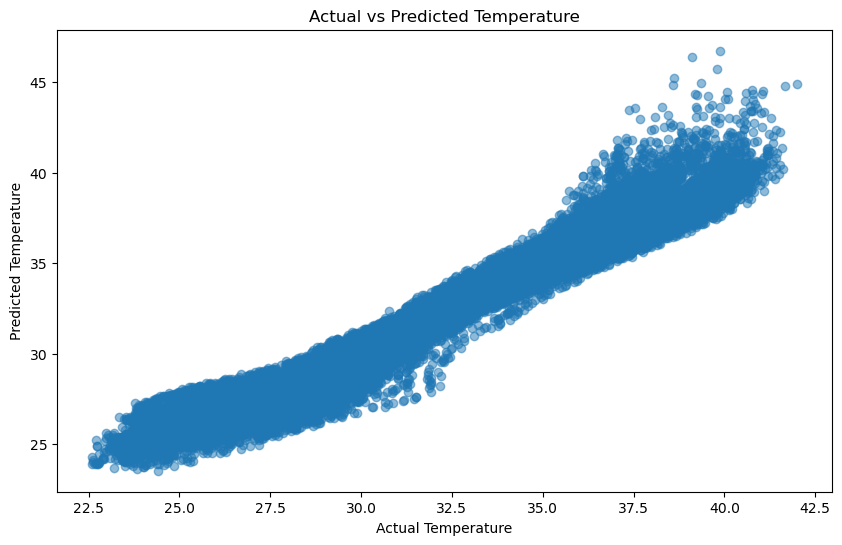

In [57]:
#VISUALIZING THE RESULTS
# Plot actual vs predicted temperatures
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

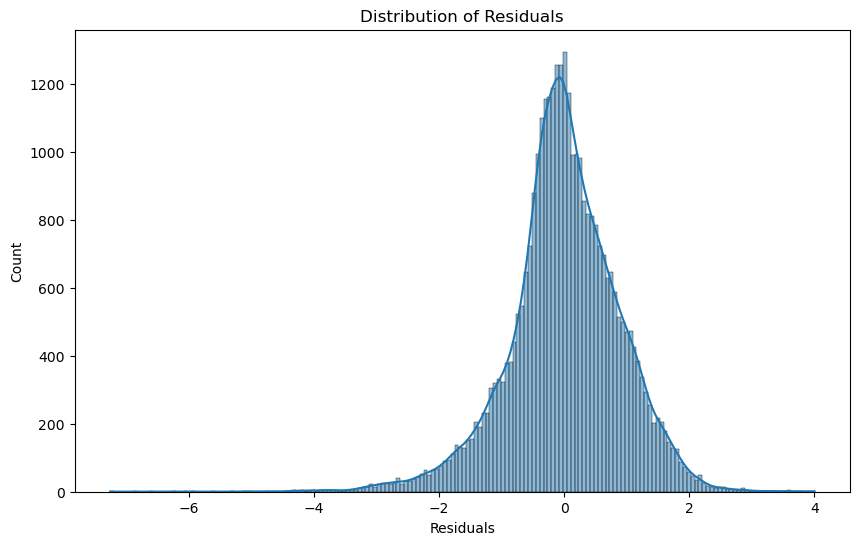

In [58]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()


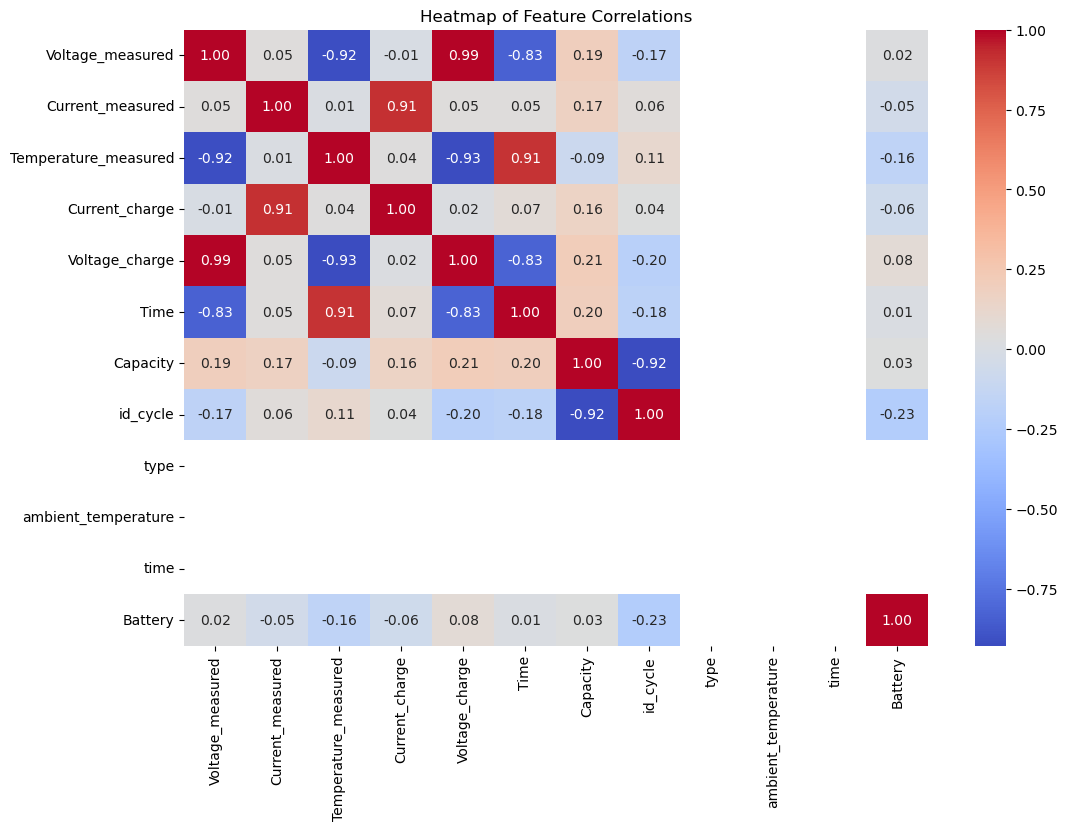

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()
